# Checkpoint 2 - EDA

In [1]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
import os, numpy, scipy, statistics, matplotlib.pyplot as plt, IPython.display as ipd
from IPython.display import Audio
import pandas as pd
from scipy.stats import mode
import json
import IPython.display as ipd
from scipy.stats import mode
import nltk 
from nltk.util import ngrams


In [2]:
echo nltk.__version__


SyntaxError: invalid syntax (<ipython-input-2-128d67d538b3>, line 1)

In [2]:
def load(indir=None,outdir=None): 
    songs = os.listdir(indir)
    y_array = []
    sr_array = []
    song_name = []
    for i in songs:
        if '.DS_Store' in i: 
            continue
        y, sr = librosa.load(indir+'/'+ i)
        y_array.append(y)
        sr_array.append(sr)
        song_name.append(i)
    
    
    df = pd.DataFrame({'Name': song_name,
                       'y': y_array,
                       'sr': sr_array})
    #df.to_csv(os.path.join(outdir,r'loaded_data.csv',index=False))
    #df.to_json(os.path.join(outdir,r'loaded_data.txt'))
    
    return df

In [3]:
def get_clean_data(df):
    dfdict = {'songs': [], 'y': [], 'sr': []}
    fmin = librosa.midi_to_hz(36)
    hop_length = 512
    
    audio = list(df['Name'])
    ys = np.asarray(list(df['y']))
    srs = list(df['sr'])

    
    pitchdict = {'Asavari Natabhairavi 1': 'C#', 'Asavari Natabhairavi 2': 'D',
                 'Asavari Natabhairavi 3': 'D',
               'Bhairav Mayamalavagowlai 1': 'C#', 'Bhairav Mayamalavagowlai 2': 'C', 
               'Bhairav Mayamalavagowlai 3': 'C#', 'Bhairav Mayamalavagowlai 4': 'D', 
                'Bhairav Mayamalavagowlai 5': 'D', 
                'Bhairavi Hanumatodi 1': 'D',
               'Bhairavi Hanumatodi 2': 'C', 'Bhairavi Hanumatodi 3': 'D#',
               'Bilawal Dheerashankarabharanam 1': 'D', 'Bilawal Dheerashankarabharanam 2': 'D#',
               'Bilawal Dheerashankarabharanam 3': 'E', 
                 'Bilawal Dheerashankarabharanam 4': 'C#',
                 'Bilawal Dheerashankarabharanam 5': 'C#',
                 'Kafi Karaharapriya 1': 'D',
               'Kafi Karaharapriya 2': 'D', 'Kafi Karaharapriya 3': 'D#',
               "Kalyan Kalyani 1": 'E', "Kalyan Kalyani 2": 'D#', 'Kalyan Kalyani 3': 'D#',
                 "Kalyan Kalyani 4": 'D',"Kalyan Kalyani 5": 'D',
               'Khamaj Harikambhoji 1': 'D', 'Khamaj Harikambhoji 2': 'E', 'Khamaj Harikambhoji 3': 'E',
                  'Khamaj Harikambhoji 4': 'E',  'Khamaj Harikambhoji 5': 'C#',
               'Marva Gamanasharma 1': 'C', 'Marva Gamanasharma 2': 'E', 'Marva Gamanasharma 3': 'D',
                'Marva Gamanasharma 4': 'C#','Poorvi Kamavardhani 1': 'C#', 'Poorvi Kamavardhani 2': 'C#',
                 'Poorvi Kamavardhani 3': 'C#', 'Todi Subhapantuvarali 1': 'C', 'Todi Subhapantuvarali 2': 'C#', 'Todi Subhapantuvarali 3': 'D'}
    
    #iterate through input dict
    for i in range(len(df)):
        
        y = ys[i]
        sr = srs[i]
        
        #check pitch of each input
        #chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=hop_length)
        
        pitch = pitchdict[audio[i][:-4]]
        
        if pitch == 'C':
            newy = y
        elif pitch == 'C#':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=-1)
        elif pitch == 'D':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=-2)
        elif pitch == 'D#':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=-3)
        elif pitch == 'E':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=-4)
        elif pitch == 'F':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=-5)
        elif pitch == 'F#':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=-6)
        elif pitch == 'G':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=-7)
        elif pitch == 'G#':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=+4)
        elif pitch == 'A':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=+3)
        elif pitch == 'A#':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=+2)
        elif pitch == 'B':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=+1)
        
        y = newy  
        ylist = []
        first = 0
        second = 10000
        while second < len(y):
            
            ylist.append(y[first:second])
            first = second
            second = second + 10000
            
        cliptitles = []
        
        for j in range(len(ylist)):
            string = audio[i][:-6]
            cliptitles.append(string)
            
        for k in range(len(cliptitles)):
            dfdict['songs'].append(cliptitles[k])
            dfdict['y'].append(ylist[k])

            dfdict['sr'].append(sr)
            
    newdf = pd.DataFrame(dfdict)
    
    return newdf

In [4]:
def clean_data(indir = None, outdir = None):

    if outdir and not os.path.exists(outdir):
        os.makedirs(outdir)
    df = pd.read_pickle('data/loaded_data.pkl')  
    cleaned = get_clean_data(df)
   
    cleaned.to_pickle(os.path.join(outdir,r'cleaned_data.pkl'))
    
    return cleaned

# EDA

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

virdis = cm.get_cmap('viridis', 12)
print(viridis.colors)

NameError: name 'viridis' is not defined

In [15]:
y,sr = librosa.load('test_data_raw/Bilawal Dheerashankarabharanam 1.mp3',duration=45,offset=45)

/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


Text(0.5,1,'Bhairav Mayalmalskjf Chromagram')

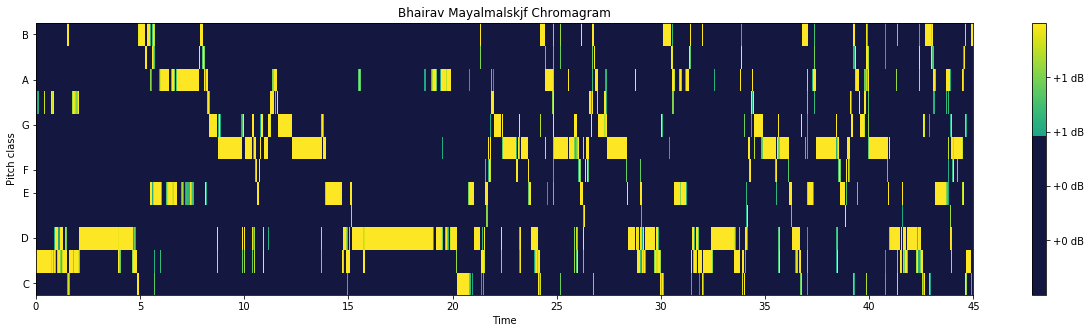

In [16]:
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([20/256, 24/256, 64/256, 1])
newcolors[:150, :] = pink
newcmp = ListedColormap(newcolors)

chromagram = librosa.feature.chroma_stft(y,sr)
plt.figure(figsize=(21, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap=newcmp)
plt.colorbar(format='%+2.0f dB')
plt.title('Bhairav Mayalmalskjf Chromagram')

In [4]:
def average_dist(df):
    y_list = df['y'] #ys for every clip
    sr_list = df['sr']
    hop_length = 512
    notes = {'C': 0,'C#': 0,'D': 0,'D#': 0,'E': 0,'F': 0,'F#': 0,'G': 0,'G#': 0,'A': 0,'A#': 0,'B': 0}
    global_notecount = 0 
    #goes through all clips
    for i in range(len(y_list)): 
        
        chromagram = librosa.feature.chroma_stft(y = y_list[i], sr=sr_list[i], hop_length=hop_length)
        #plt.figure(figsize=(17, 5))
        #librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')
        
        notecount = 0 #total number of notes we are getting from clip
        counts = [] #final length should be 12
     
        seq_notes = []
        #go through each 1/43rd of a second 
       # print(len(chromagram.T),'chromagram.T should be large number')
        for row in chromagram.T:
            seq_notes.append(np.argmax(row)) #index of note with highest frequency at that 1/43rd of a second
        all_notes = pd.Series(seq_notes).apply(numtonote)
    
        values = []
        for i in range(0, len(all_notes),86):
            curr = all_notes[i:i+86]
            values.append(mode(curr)[0][0])
        notecount = len(values)
        global_notecount += notecount
        
        #add notecount to global dictionary directly
        for i in values:   
            if i in notes:
                notes[i]+=1
            else: 
                notes[i] = 1
        

    for note in notes:
        notes[note] = notes[note]/global_notecount
        
    notedf = pd.DataFrame.from_dict(notes, orient = 'index')
    return notedf


def EDA(df): 
    
    cleaned_df = get_clean_data(df)
    
    histogram_df = average_dist(cleaned_df)
    histogram_df = histogram_df.sort_values(by=0,ascending=False).rename(columns={0:'Notes'})
    #plot = histogram_df.sort_values(by=[0])[:7].sort_index().rename(columns={0:'Notes'}).plot(kind = 'bar', title = 'Songs')
    #plot.set_xlabel("Notes")
    #plot.set_ylabel("Frequency")
    
    return histogram_df

In [6]:
#TRIGRAM BIGRAM

In [5]:
def extract_ngrams(chromagram, num):
    seq_notes = []
    max_val = []
    for row in chromagram.T:
        seq_notes.append(np.argmax(row))
        max_val.append(np.max(row))
    all_notes = pd.Series(seq_notes).apply(numtonote)

    values = []
    for i in range(0, len(all_notes),22):
        curr = all_notes[i:i+22]
        values.append(mode(curr)[0][0])
    #print(values)

    newvals = []
    for i in range(len(values)):
        if i != 0 and values[i] == values[i-1]:
            continue
        else:
            newvals.append(values[i])
    #print(newvals)
        
    
    n_grams = ngrams(newvals, num)
    fdist = nltk.FreqDist(n_grams)
    ngramlist = []
    counts = []
    for k,v in fdist.items():
        ngramlist.append(k)
        counts.append(v)
    clipdict = {ngramlist[i]: counts[i] for i in range(len(ngramlist))}

    return clipdict

In [6]:
def numtonote(num):
    if num == 0:
        return 'C'
    if num == 1:
        return 'C#'
    if num == 2:
        return 'D'
    if num == 3:
        return 'D#'
    if num == 4:
        return 'E'
    if num == 5:
        return 'F'
    if num == 6:
        return 'F#'
    if num == 7:
        return 'G'
    if num == 8:
        return 'G#'
    if num == 9:
        return 'A'
    if num == 10:
        return 'A#'
    if num == 11:
        return 'B'


def create_ngrams(songs):
    y_array = []
    sr_array = []
    song_name = []
    for i in songs:
        if '.DS_Store' in i: 
            continue
        y,sr = librosa.load('test_data_raw/'+ i)
        y_array.append(y)
        sr_array.append(sr)
        song_name.append(i)

    df = pd.DataFrame({'Name': song_name,
                       'y': y_array,
                       'sr': sr_array})
    
    cleaned_df = get_clean_data(df)
    #gives us df of clip title (raga name), y, sr
    
    y_list = cleaned_df['y']
    sr_list = cleaned_df['sr']
    
    ragabigrams = {}
    ragatrigrams = {}
    
    for i in range(len(y_list)):
        chromagram = librosa.feature.chroma_stft(y = y_list[i], sr=sr_list[i], hop_length=512)
        if i == 2: 
            plt.figure(figsize=(17, 5))
            librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')
            
        
        #helper function return
        bigramdict = extract_ngrams(chromagram,2)
        for key in bigramdict:
            if key in ragabigrams:
                ragabigrams[key] += bigramdict[key]
                
            else:
                ragabigrams[key] = bigramdict[key]
                
                bigramdict = extract_ngrams(chromagram,2)
        
        trigramdict = extract_ngrams(chromagram,3)
        for key in trigramdict:
            if key in ragatrigrams:
                ragatrigrams[key] += trigramdict[key]
                
            else:
                ragatrigrams[key] = trigramdict[key]
        
        
    #bdf = pd.DataFrame(ragabigrams)
    #tdf = pd.DataFrame(ragatrigrams)
    
    bdf = pd.DataFrame({'Bigrams': list(ragabigrams.keys()), 'Counts': list(ragabigrams.values())})
    plot = bdf.sort_values(by = 'Counts', ascending = False)[:10].plot(kind = 'bar', x= 'Bigrams', y = 'Counts', title = songs[0][:-6]) 
    plot.set_xlabel("Bigrams")
    plot.set_ylabel("Counts")
    
    tdf = pd.DataFrame({'Trigrams': list(ragatrigrams.keys()), 'Counts': list(ragatrigrams.values())})
    plot2 = tdf.sort_values(by = 'Counts', ascending = False)[:10].plot(kind = 'bar', x= 'Trigrams', y = 'Counts', title = songs[0][:-6]) 
    plot2.set_xlabel("Trigrams")
    plot2.set_ylabel("Counts")
    
    
    
    return ipd.Audio(y_list[2],rate=sr_list[2])
def extract_ngrams(chromagram, num):
    seq_notes = []
    max_val = []
    for row in chromagram.T:
        seq_notes.append(np.argmax(row))
        max_val.append(np.max(row))
    all_notes = pd.Series(seq_notes).apply(numtonote)

    values = []
    for i in range(0, len(all_notes),22):
        curr = all_notes[i:i+22]
        values.append(mode(curr)[0][0])
    #print(values)

    newvals = []
    for i in range(len(values)):
        if i != 0 and values[i] == values[i-1]:
            continue
        else:
            newvals.append(values[i])
    #print(newvals)
        
    
    n_grams = ngrams(newvals, num)
    fdist = nltk.FreqDist(n_grams)
    ngramlist = []
    counts = []
    for k,v in fdist.items():
        ngramlist.append(k)
        counts.append(v)
    clipdict = {ngramlist[i]: counts[i] for i in range(len(ngramlist))}

    return clipdict

In [7]:
#returns top 8 notes of audio file you put in 
def find_raga(audio_file):
    frequency_df = EDA(audio_file)
    top_notes = list(frequency_df.index)
    compare_list = []
    
    for i in raga_dict: 
        compare_list.append(len(set(raga_dict[i]) & set(top_notes)))
    
    max_index = np.argmax(compare_list)
    raga_name = list(raga_dict)[max_index]
    print(raga_name,'raga name')
    print(raga_dict[raga_name],'notes')
    return raga_name

In [8]:
#scales of ragas
raga_dict = {'Asavari': ['C','D','D#','F','G','G#','A#','C'],
            'Bilawal': ['C','D','E','F','G','A','B','C'],
            'Bhairav': ['C','C#','E','F','G','G#','B','C'],
            'Bhairavi': ['C','C#','D#','F','G','G#','A#','C'],
            'Kafi': ['C','D','D#','F','G','A','A#','C'],
            'Kalyan': ['C','D','E','F#','G','A','B','C'],
            'Khamaj': ['C','D','E','F','G','A','A#','C'],
            'Marwa': ['C','C#','E','F#','G','A','B','C'],
            'Poorvi': ['C','C#','E','F#','G','G#','B','C'],
            'Todi': ['C','C#','D#','F#','G','G#','B','C']}

In [9]:
def raga_finder_individual_clips(songs):
    y_array = []
    sr_array = []
    song_name = []
    for i in songs:
        if '.DS_Store' in i: 
            continue
        y,sr = librosa.load('test_data_raw/'+ i)
        y_array.append(y)
        sr_array.append(sr)
        song_name.append(i)

    df = pd.DataFrame({'Name': song_name,
                       'y': y_array,
                       'sr': sr_array})
    cleaned_df = get_clean_data(df) 
    display(len(cleaned_df),'len cleaned df ')
    y_list = cleaned_df['y']
    sr_list = cleaned_df['sr']
    
    raga_list = []
    notes_list = []
    for i in range(len(cleaned_df)):
        
        chromagram = librosa.feature.chroma_stft(y = y_list[i], sr=sr_list[i], hop_length=512)
        top_8 = return_main_notes(chromagram)
        print(top_8,'top8')
        #immediately classify that smaller clip 
        compare_list = []

        for j in raga_dict: 
            compare_list.append(len(set(raga_dict[j]) & set(top_8)))

        max_index = np.argmax(compare_list)
        raga_name = list(raga_dict)[max_index]
        raga_list.append(raga_name)
        notes_list.append(raga_dict[raga_name])
    print(len(raga_list),'rag list')
    print(len(notes_list),'notes list')

    return raga_list#dict(zip(raga_list, notes_list)) 

In [10]:
def raga_finder_whole_song(songs):
   
    eda = EDA(songs)
    top_8 = list(eda.index)
    print(top_8,'top 8')
    
    compare_list = []
    for i in raga_dict: 
        compare_list.append(len(set(raga_dict[i]) & set(top_8)))
    print(compare_list,'compare list')

    max_index = np.argmax(compare_list)
    raga_name = list(raga_dict)[max_index]
    
    return raga_name

In [11]:
#gives back 8 notes 
def return_main_notes(chromagram):
    total_occurences_above_8 = []
    notes = {'C': 0,'C#': 0,'D': 0,'D#': 0,'E': 0,'F': 0,'F#': 0,'G': 0,'G#': 0,'A': 0,'A#': 0,'B': 0}

    notecount = 0 #total number of notes we are getting from clip
    counts = [] #final length should be 12

    seq_notes = []
    #go through each 1/43rd of a second 
    for row in chromagram.T:
        seq_notes.append(np.argmax(row)) #index of note with highest frequency at that 1/43rd of a second
    all_notes = pd.Series(seq_notes).apply(numtonote)

    values = []
    for i in range(0, len(all_notes),86):
        curr = all_notes[i:i+86]
        values.append(mode(curr)[0][0])
    notecount = len(values)

    #add notecount to global dictionary directly
    for i in values:   
        if i in notes:
            notes[i]+=1
        else: 
            notes[i] = 1
    
    for n in notes: 
        notes[n] = notes[n]/notecount
        
    notedf = pd.DataFrame.from_dict(notes, orient = 'index')

    main_notes = list(notedf.sort_values(by=0,ascending=False)[:7].index)
        
    return main_notes

In [12]:
#accuracy score

def accuracy_score(predictions,raga): 
    
    acc_score = 0 
    for i in range(len(predictions)): 
        if predictions[i] == raga: 
            acc_score+=1
    return acc_score/len(predictions)

In [13]:
#MODEL Development

In [ ]:
#make a df of 
#Name, y, sr 
#Name is og name, y and sr have to be the trimmed one

In [14]:
y_array = []
sr_array = []

In [72]:
len(y_array)

6

In [15]:
names = ['Bilawal Dheerashankarabharanam 1.mp3',
        'Bilawal Dheerashankarabharanam 2.mp3',
        'Bilawal Dheerashankarabharanam 2.mp3',
        'Bilawal Dheerashankarabharanam 2.mp3',
        'Bilawal Dheerashankarabharanam 3.mp3',
        'Bilawal Dheerashankarabharanam 4.mp3']

In [24]:
y,sr = librosa.load('test_data_raw/Bilawal Dheerashankarabharanam 4.mp3',offset=0,duration=300)
y_array.append(y)
sr_array.append(sr)

/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [56]:
def new_EDA(y1,sr1): 
    
    df = pd.DataFrame({'Name':names[0],
                     'y':y1,
                      'sr':sr1})
    
    cleaned_df = get_clean_data(df)
    
    histogram_df = average_dist(cleaned_df)
    histogram_df = histogram_df.sort_values(by=0,ascending=False).rename(columns={0:'Notes'})
    #plot = histogram_df.sort_values(by=[0])[:7].sort_index().rename(columns={0:'Notes'}).plot(kind = 'bar', title = 'Songs')
    #plot.set_xlabel("Notes")
    #plot.set_ylabel("Frequency")
    
    return histogram_df

In [85]:
def calculate_stats(y1,sr1,names): 
    frequencies = []
    top_7 = []

    for i in range(len(y1)): 
        df = pd.DataFrame({'Name':names[i],
                  'y':y1[i],
                  'sr':sr1[i]})
        result = top_and_freq_for_one_clip(y1[i],sr1[i])
        top_7.append(result[0])
        frequencies.append(result[1])
        names.append(names[i][:-4])
    return frequencies, top_7, names

In [86]:
def top_and_freq_for_one_clip(y1,sr1): 
  
    
    eda_result = new_EDA(y1,sr1)
    top_notes = list(eda_result.sort_values(by="Notes",ascending=False)[:7].index)
    
    top_frequencies = list(eda_result.sort_index()['Notes'])
    
    return [top_notes,top_frequencies]

In [87]:
bilawal = calculate_stats(y_array,sr_array,names)

[ 0.          0.          0.         ... -0.0450695  -0.04682785
 -0.02899472] y
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'int'>


ParameterError: Audio data must be of type numpy.ndarray